# Exploratory Data Analysis on the `Tips` dataset

Mattéo Menager - 20105354

# Which datasets to consider?

In [1]:
import random

# Students should replace 12345678 with their student id (8-digit number, starting with 200)
myStudentId = 20105354

# Use myStudentId as the seed for the random number generator
random.seed(myStudentId)

dataSetToIgnore = random.choice(['Tips', 'Titanic', 'Algae'])
dataSetToIgnore

'Titanic'

Following the random dataset selection, I will work on the `Tips` and `Algae` datasets. In an effort to keep the notebook clean, I will only work on the `Tips` dataset in this notebook. The `Algae` dataset will be explored in a separate notebook.

# Notes on running this notebook. 

This notebook can be run using the `data-mining` anaconda environment created at the beginning of the semester. 

This environment is a regular anaconda environment with the following packages added: `dtale`, `voila`, `feature-tools`, `graphviz`, `pydot`, `ipywidgets`, `phik`, `pingouin`.

The Python version of this environment is `3.11.5`.

# Task 1: First pass - load data set and initial clean

## 1.1 Importing libraries

Before anaything, we will import the libraries we will need for this notebook : some core data science modules, statistical modules and some visualisations modules. 

In [2]:
# core data science libraries
import numpy as np
import pandas as pd

# statistical modules
import scipy.stats as stats 
import statsmodels.api as sm 
import pingouin as pg

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets

# set the default style for plots
plt.style.use("seaborn-darkgrid")

# matplotlib magic to show plots inline
%matplotlib inline

/var/folders/dt/58d383mx6m5glpsgpmmsbj_80000gn/T/ipykernel_54465/1283187840.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


## 1.2 Importing the dataset and inspecting it

Next, we need to import our dataset into a pandas dataframe.

In [3]:
df = pd.read_csv('data/01-Tips/tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Perfect, we have our dataset loaded into a pandas dataframe. We can see abovce the first few rows, and the column names. Now we'll just look at some basic information about the dataset : size, column types as well as the last few rows.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


We can see that the dataset has 244 rows and 7 columns. The columns are all of type `object` except for `total_bill` and `tip` which are of type `float64` and `size` which is of type `int64`.

We can also see that the dataset has no missing values.

In [5]:
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


We can also confirm that there are no extraneous values at the end of the file.

In [6]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

Finally, column names are short, descriptive and do not contain any spaces or special characters. This will make it easier to work with the dataset.

## 1.3 Converting categorical columns to `category` type

The dataset is clean. The only thing we need to do is to convert the categorical columns to the `category` type.

In [7]:
df.sex.unique()

array(['Female', 'Male'], dtype=object)

In [8]:
df.sex = pd.Categorical(df.sex)
df.sex.unique()

['Female', 'Male']
Categories (2, object): ['Female', 'Male']

In [9]:
df.smoker.unique()

array(['No', 'Yes'], dtype=object)

In [10]:
df.smoker = pd.Categorical(df.smoker)
df.smoker.unique()

['No', 'Yes']
Categories (2, object): ['No', 'Yes']

In [11]:
df.day.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [12]:
df.day = pd.Categorical(df.day, categories=['Thur', 'Fri','Sat', 'Sun'], ordered=True)
df.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur' < 'Fri' < 'Sat' < 'Sun']

In [13]:
df.time.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [14]:
df.time = pd.Categorical(df.time, categories=['Lunch', 'Dinner'], ordered=True)
df.time.unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch' < 'Dinner']

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


Our data is clean, column names are short and descriptive, and the data types are correct. We can now move on to the second pass.

# Task 2: Second pass - individual features 

In this section, we will look at each feature individually. For this dataset, there is no target so we will not have to look at relationships to the target. 

## 2.1 Numerical features

Let's first look at the numerical features. We have 3 numerical features : `total_bill`, `tip` and `size`.

We can start by computing some basic statistics on these features.

In [16]:
numericals = df.loc[:, ['total_bill', 'tip', 'size']]
numericals.head()

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


In [17]:
numericals.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


We will also look at the distribution of these features using a histogram and a boxplot.

total_bill       AxesSubplot(0.125,0.11;0.227941x0.77)
tip           AxesSubplot(0.398529,0.11;0.227941x0.77)
size          AxesSubplot(0.672059,0.11;0.227941x0.77)
dtype: object

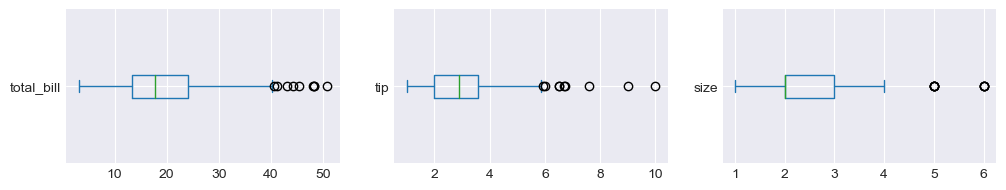

In [18]:
numericals.plot(kind='box', figsize=(12,2), subplots=True, layout=(1,3), sharex=False, sharey=False, vert=False)

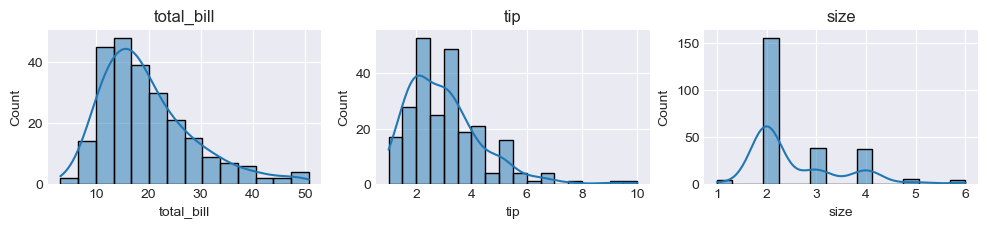

In [19]:
fig, axes = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(12, 2))
for column, ax in zip(numericals.columns, axes):
    sns.histplot(numericals[column], kde=True, ax=ax)
    ax.set_title(column)

Looking at the boxplots and histograms, we can see that the `total_bill` and `tip` features are skewed to the right. We can also see that they both have outliers on the right side. However these outliers look like valid data points and not errors.

The `size` feature has only 6 possible values, and most of the values are 2. The 1, 5, and 6 tables are very rare.

Based on the relationships we find between feqtures in pass 3, we may want to create/modify features to make the analysis simplier and clearer. 

For example we could :

- Create a feature `tip_percentage` which would be the tip divided by the total bill.
- Create a feature `bill_per_person` which would be the total bill divided by the number of people at the table.
- Treat the `size` feature as a categorical feature : 1, 2, medium (3,4), large (5,6) OR 2, not-2

Also, using `tip_percentage` and `bill_per_person` instead of `total_bill`, `tip`, and `size` could avoid multicollinearity issues in case we wanted to do regression for example because these variables are likeley to be intercorrelated.

We will see in pass 3 if some of these ideas make sense.

## 2.2 Categorical features

Let's now look at the categorical features. We have 4 categorical features : `sex`, `smoker`, `day` and `time`.

In [20]:
categoricals = df.loc[:, ['sex', 'smoker', 'day', 'time']]

We can start by looking at how observations are distributed across the different categories.

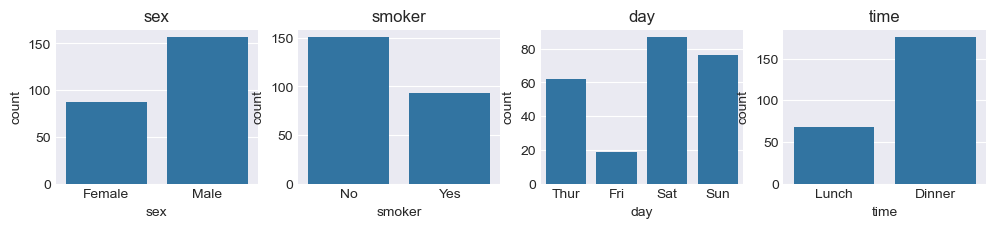

In [21]:
fig, axes = plt.subplots(1, 4, sharex=False, sharey=False, figsize=(12, 2))
for column, ax in zip(categoricals.columns, axes):
    sns.countplot(x=column, data=categoricals, ax=ax)
    ax.set_title(column)


`sex` and `smoker` are not perfectly balanced, but they are not too far away either. `time` is less balanced, with a lot more observations for dinner than for lunch. `day` is well balanced except for Friday which has much less observations than the other days.

As none of those features is a target, and they are not too unbalanced either, we will not need to do sampling for example. 

# Task 3: Third pass - relationships between features

## 3.1 Numerical features

To start we can look at correlations between our 3 numerical features and plot them.

In [22]:
numericals.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


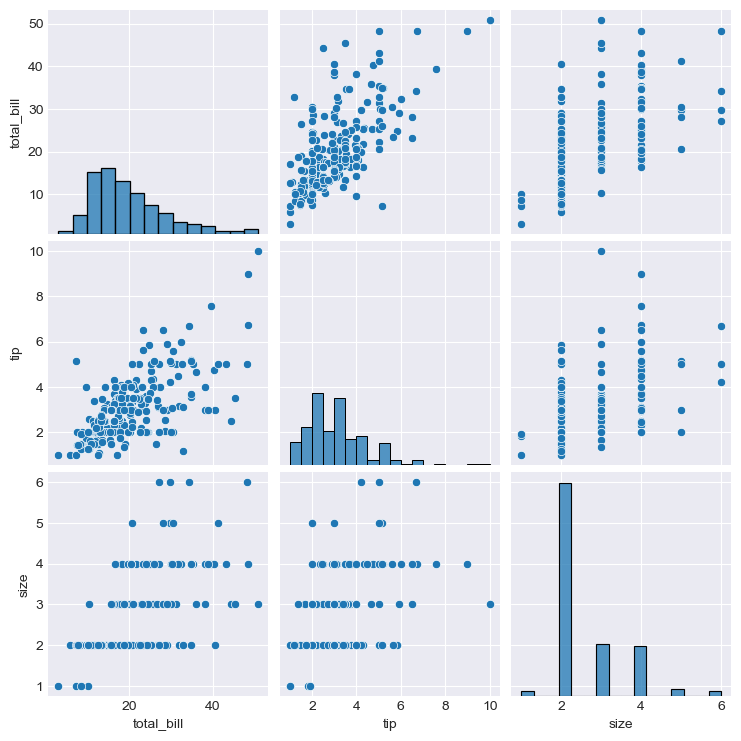

In [23]:
# plot each numerical variable against each other (scatter)
sns.pairplot(numericals)

We can see that there is definitly a linear relationship between `total_bill` and `tip`. This is expected as tips can be calculated automatically as a percentage when paying by card. But we can also see that tips have a propensity to remain lower than what a linear relationship would predict as the `total_bill` increases. This could be when people pay in cash (or by card and choose the option to put a custom tip amount) and thus do not calculate the tip as a percentage and leave an arbitrary tip amount. This could explain why the correlation coefficient is not very high.

The relationship between `tip` and `size` and `total_bill` and `size` is less obvious but we can still observe a positive relationship in both cases, which makes sense as the more people there are at the table, the higher the bill and the tip are likely to be.

However, it might be interesting to convert `size` to a categorical feature as compare the distributions of `tip` and `total_bill` for different table sizes.

In [24]:
# convert size to categorical (alone, couple, group)
df['group_size'] = pd.cut(df['size'], bins=[0,1,2,6], labels=['alone', 'couple', 'group'])
df.head()

,total_bill,tip,sex,smoker,day,time,size,group_size
0,16.99,1.01,Female,No,Sun,Dinner,2,couple
1,10.34,1.66,Male,No,Sun,Dinner,3,group
2,21.01,3.50,Male,No,Sun,Dinner,3,group
3,23.68,3.31,Male,No,Sun,Dinner,2,couple
4,24.59,3.61,Female,No,Sun,Dinner,4,group


As there is a notion of order, it would be strange to group 1 with larger groups. Also differentiating medium (3,4) and large (5,6) might not add clarity as we do not have a lot of observations for larger groups. So I decided to group into more natural groups : people eating alone, people eating 1 to 1, people eating in groups.

<AxesSubplot: xlabel='group_size', ylabel='count'>

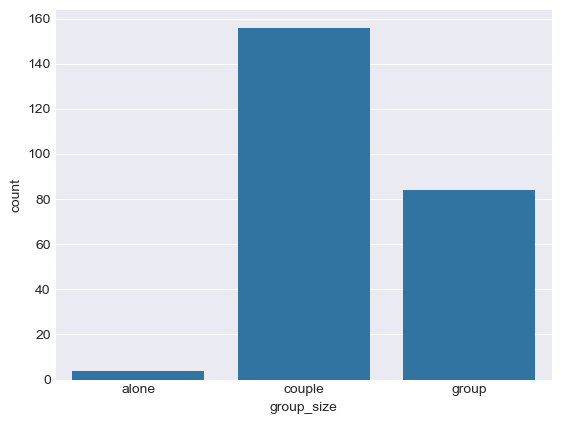

In [25]:
sns.countplot(x='group_size', data=df)

This gives us an unbalanced categorical feature, but it is not a problem as we are not using it as a target.

We can now compare how tips and bills are distributed for different table sizes.

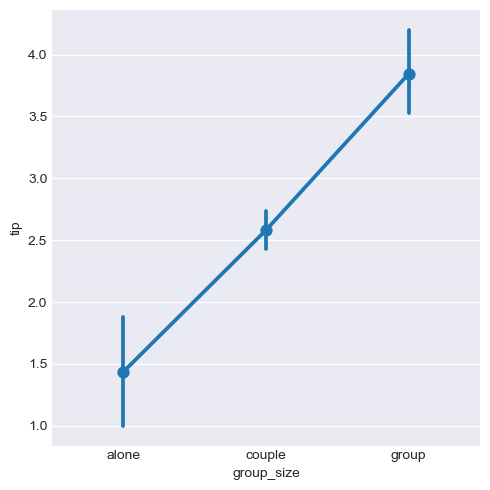

In [26]:
sns.catplot(x='group_size', y='tip', data=df, kind='point')

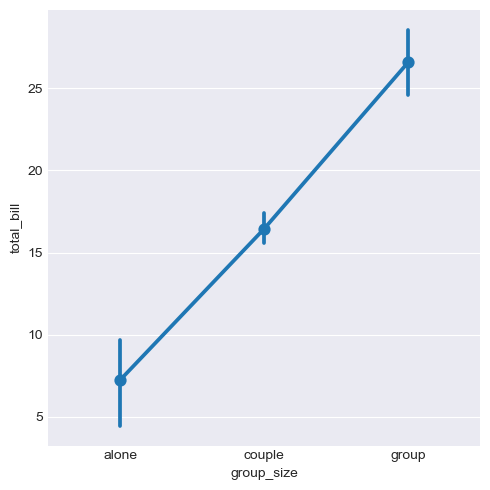

In [27]:
sns.catplot(x='group_size', y='total_bill', data=df, kind='point')

The expected relationship between `group_size` and `tip`or `total_bill` appears much clearly this way.

## 3.2 Categorical features

We will now look at relationships between categorical variables. We will include our new categorical variable `group_size` in this analysis.

In [28]:
# include group size in the numericals
categoricals = df[['sex', 'smoker', 'day', 'time', 'group_size']]
categoricals.head()

,sex,smoker,day,time,group_size
0,Female,No,Sun,Dinner,couple
1,Male,No,Sun,Dinner,group
2,Male,No,Sun,Dinner,group
3,Male,No,Sun,Dinner,couple
4,Female,No,Sun,Dinner,group


We start by looking at the Phik correlation coefficient between our categorical variables.

In [29]:
import phik 

corr = categoricals.phik_matrix()
corr

,sex,smoker,day,time,group_size
sex,1.000000,0.000000,0.309001,0.286979,0.050007
smoker,0.000000,1.000000,0.455862,0.000000,0.053214
day,0.309001,0.455862,1.000000,0.995930,0.173619
time,0.286979,0.000000,0.995930,1.000000,0.099242
group_size,0.050007,0.053214,0.173619,0.099242,1.000000


<AxesSubplot: >

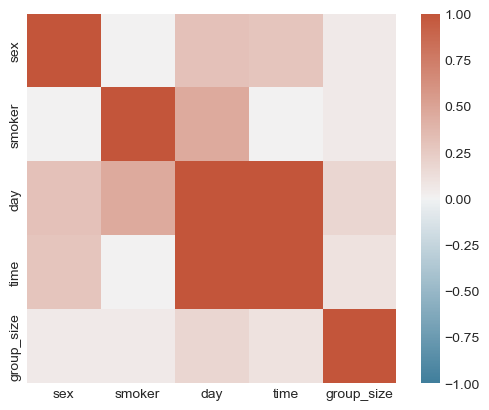

In [30]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, square=True, vmin=-1, vmax=1)

Apparently, day and time are almost perfectly correlated. 

Then we have a small correlation between day and smoker. 

We also have smaller correlations between day and sex, and between time and sex. It makes sense to have both as day and time are almost perfectly correlated.

Other correlations are too small to be be considered, especially on such a small dataset with unbalanced categories (very few observations for some of them).

We can also note that `smoker` is completely uncorrelated with all the variables (except for day). `group_size` is uncorrelated with all the categorical features (small correlations that can be ignored).

In [31]:
ddCol = widgets.Dropdown(options=categoricals.columns, value=categoricals.columns[0], description="Column")
ddHue = widgets.Dropdown(options=categoricals.columns, value=categoricals.columns[0], description="Hue")

uiControls = widgets.HBox([ddCol, ddHue])

def doCountplot(column, hue):
    p=sns.countplot(data=df, x=column, hue=hue)
    
out = widgets.interactive_output(doCountplot, {"column":ddCol, "hue":ddHue})
display(uiControls, out)

Output()

Using the interactive chart above, we can confirm the almost perfect correlation between time and day. In fact, almost all observations on Thursday are lunch (which makes sense as it is a weekday) and all observations on Saturday and Sunday are dinner (which also makes sense as it is the weekend).

However, these observations seem extreme and might tell us more about where the data comes from (e.g. a restaurant closed for lunch on weekends) than about the actual relationship between the features in a more general context.

All other correlations mentionned do not make much sense from a logical point of view. This is probably due to the small size of the dataset and the unbalanced categories. In addition, the coefficients were not very big.

## 3.3 Categorical features x numerical features

As we've seen earlier, treating `size` as a categorical variable makes out analysis easier and clearer. For this reason we will treat `size` as a categorical variable in this section.

Also we will create two new features : `tip_percentage` and `bill_per_person`. and see if it helps.

In [32]:
df['tip_percentage'] = df['tip'] / df['total_bill']
df.head()

,total_bill,tip,sex,smoker,day,time,size,group_size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,couple,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,group,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,group,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,couple,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,group,0.146808


In [33]:
df['bill_per_person'] = df['total_bill'] / df['size']
df.head()

,total_bill,tip,sex,smoker,day,time,size,group_size,tip_percentage,bill_per_person
0,16.99,1.01,Female,No,Sun,Dinner,2,couple,0.059447,8.495000
1,10.34,1.66,Male,No,Sun,Dinner,3,group,0.160542,3.446667
2,21.01,3.50,Male,No,Sun,Dinner,3,group,0.166587,7.003333
3,23.68,3.31,Male,No,Sun,Dinner,2,couple,0.139780,11.840000
4,24.59,3.61,Female,No,Sun,Dinner,4,group,0.146808,6.147500


<AxesSubplot: xlabel='bill_per_person', ylabel='tip_percentage'>

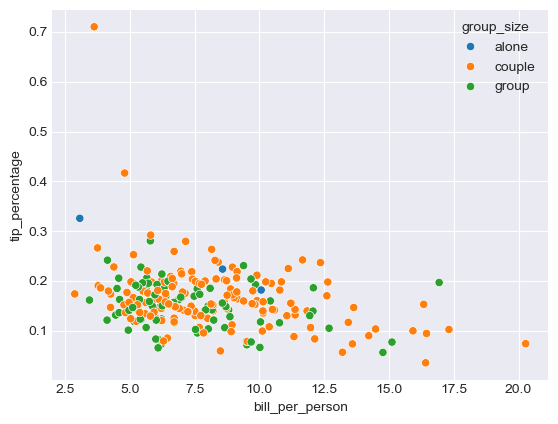

In [34]:
sns.scatterplot(data=df, x='bill_per_person', y='tip_percentage', hue='group_size')

In [35]:
df.corr()

/var/folders/dt/58d383mx6m5glpsgpmmsbj_80000gn/T/ipykernel_54465/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,total_bill,tip,size,tip_percentage,bill_per_person
total_bill,1.000000,0.675734,0.598315,-0.338624,0.647497
tip,0.675734,1.000000,0.489299,0.342370,0.347393
size,0.598315,0.489299,1.000000,-0.142860,-0.175412
tip_percentage,-0.338624,0.342370,-0.142860,1.000000,-0.314156
bill_per_person,0.647497,0.347393,-0.175412,-0.314156,1.000000


As we can see from the chart above and the correlations coefficients, our new features do not expose any big relationships between our numerical features. 

However, the negative correlation coefficient (even though not very strong) between `tip_percentage` and `total_bill` or `bill_per_person` confirms our intuition about fixed tips which bring down the tips amount depsite the bill amount increasing in some cases. We can also see it from the decending trend in the chart. This could also reveal the fact that people tend to lower their tip percentage (or use a fixed tip amount generally lower than if calculated with a percentage) when the bill amount increases.

The chart above also highlights the fact that there is no clear relationship between `group_size` and `tip_percentage` or `bill_per_person`. Put more simply, people are not more generous when they are in groups or in couple for example. 

Also, we can't draw any conclusions for people eating alone as we only have 4 observations (see below).

In [36]:
df.loc[df['group_size'] == 'alone'].shape[0]

4

For the next part, we will use `tip_percentage` and `bill_per_person` instead of `tip` and `total_bill` as they preserve most of the information but they are not naturally linked together because of the group size. We will also keep `group_size` instead of `size` as it makes more sense in my opinion to treat is as categorical. We will just not draw conclusions from `alone` category (which we would certainely remove if we were about to create a model as we do not have enough data).

In [37]:
df2 = df.drop(columns=['size', 'total_bill', 'tip'])
categoricals2 = df2[['sex', 'smoker', 'day', 'time', 'group_size']]
numericals2 = df2[['tip_percentage', 'bill_per_person']]

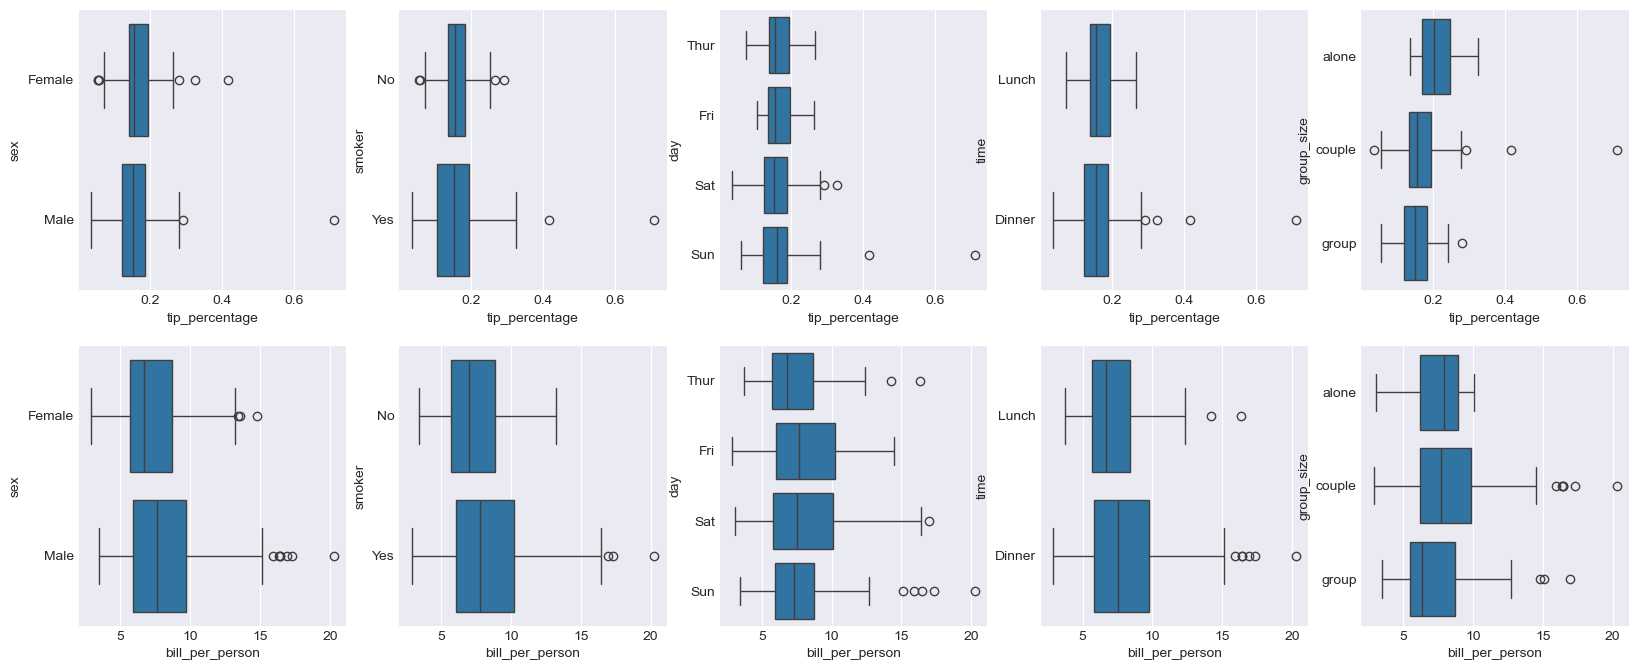

In [38]:
nb_num = len(numericals2.columns)
nb_cat = len(categoricals2.columns)
fig, axes = plt.subplots(nb_num, nb_cat, sharex=False, sharey=False, figsize=(20, 8))
for i in range(nb_num):
    for j in range(nb_cat):
        sns.boxplot(x=numericals2.columns[i], y=categoricals2.columns[j], data=df2, ax=axes[i,j])


We can see above how `tip_percentage` and `bill_per_person` are distributed for different categories of each categorical feature. To see each chart individually, we can use the interactive chart below.

Regarding `tip_percentage`, we can see that there are slightly higher 75th percentile values and/or more positive outliers for smokers, sunday, dinner and couple. This could mean that the big tips in terms of percentage are more likely to be given by smokers, on sundays, for dinner and by couples. However, the differences (or numbers of outliers) are not very big and we would need more data to confirm this. Additionally, the medians are very similar for all categories (expect for alone but remember we only have 4 observations so no conclusions can be drawn).

We can see similar results for `bill_per_person` with the addition of more outliers for the category male. However the same caution applies because of the small size of the dataset, the small differences and the simple fact that some of these "links" do not make sense.

To sum it up, all of these potential relationships are to be taken with a big grain of salt. We could potentially test if they are statistically significant using chi-square (for categorical-categorical) and ANOVA (for categorical-numerical) tests.

We can still note that some of these relationships (e.g. people spending more on dinner) could make sense, and that more data could confirm this. Also the data should be collected in a more balanced way (e.g. more observations for lunch on weekends) to avoid the extreme observations we have seen earlier.

In [39]:
ddX = widgets.Dropdown(options=numericals2.columns, value=numericals2.columns[0], description="X")
ddY = widgets.Dropdown(options=categoricals2.columns, value=categoricals2.columns[0], description="Y")

uiControls = widgets.HBox([ddX, ddY])

def doBoxPlot(x, y):
    p=sns.boxplot(data=df2, x=x, y=y)
    
out = widgets.interactive_output(doBoxPlot, {"x":ddX, "y":ddY})
display(uiControls, out)

Output()

The interactive visualisation below allows us to see that it is difficult to draw any clear conclusion from this dataset as we do not see any clear groups in the data.

In [40]:
ddHue = widgets.Dropdown(options=categoricals2.columns, value=categoricals2.columns[1], description="Hue")

uiControls = widgets.HBox([ddX, ddY, ddHue])

def doSwarmPlot(x, y, hue):
    p=sns.swarmplot(data=df2, x=x, y=y, hue=hue)
    
out = widgets.interactive_output(doSwarmPlot, {"x":ddX, "y":ddY, "hue":ddHue})
display(uiControls, out)

Output()